In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rc('font' , size = 12)
plt.rc('axes' , titlesize = 14)
plt.rc('axes' , labelsize = 12)
plt.rc('xtick' , labelsize = 12)
plt.rc('ytick' , labelsize = 12)
plt.rc('legend' , fontsize = 12)
plt.rc('figure' , titlesize = 14)
plt.rcParams['figure.dpi'] = 300
sns.set_style('whitegrid')

In [4]:
data = pd.read_csv('Downloads//netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
data.describe(include = 'all').head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN


In [6]:
movie = data[data['type'] == 'Movie']
tv_show = data[data['type'] == 'TV Show']

In [8]:
movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [9]:
tv_show.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [10]:
data = data.fillna('NULL')
data['year_added'] = data['date_added'].apply(lambda x : x.split(',')[-1])
data['year_added'] = data['year_added'].apply(lambda x : x if x!= 'NULL' else '2020')
data['year_added'] = data['year_added'].apply(int)

In [11]:
from collections import Counter
country_data = data['country']
country_counting = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
country_counting.drop(['NULL'] , axis = 0 , inplace = True)

In [12]:
tot = sum(country_counting)
top20 = sum(country_counting[:20]) 

print(f'total : {tot}')
print(f'top 20 countries : {top20}')
print(f'percentage : {top20}/{tot} = {100 * top20/tot}')

total : 10019
top 20 countries : 8694
percentage : 8694/10019 = 86.77512725820941


In [13]:
top20_country = country_counting[:20]

In [14]:
top20_country

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          160
Egypt              117
Turkey             113
Hong Kong          105
Nigeria            103
Italy              100
Brazil              97
Argentina           91
Belgium             90
dtype: int64

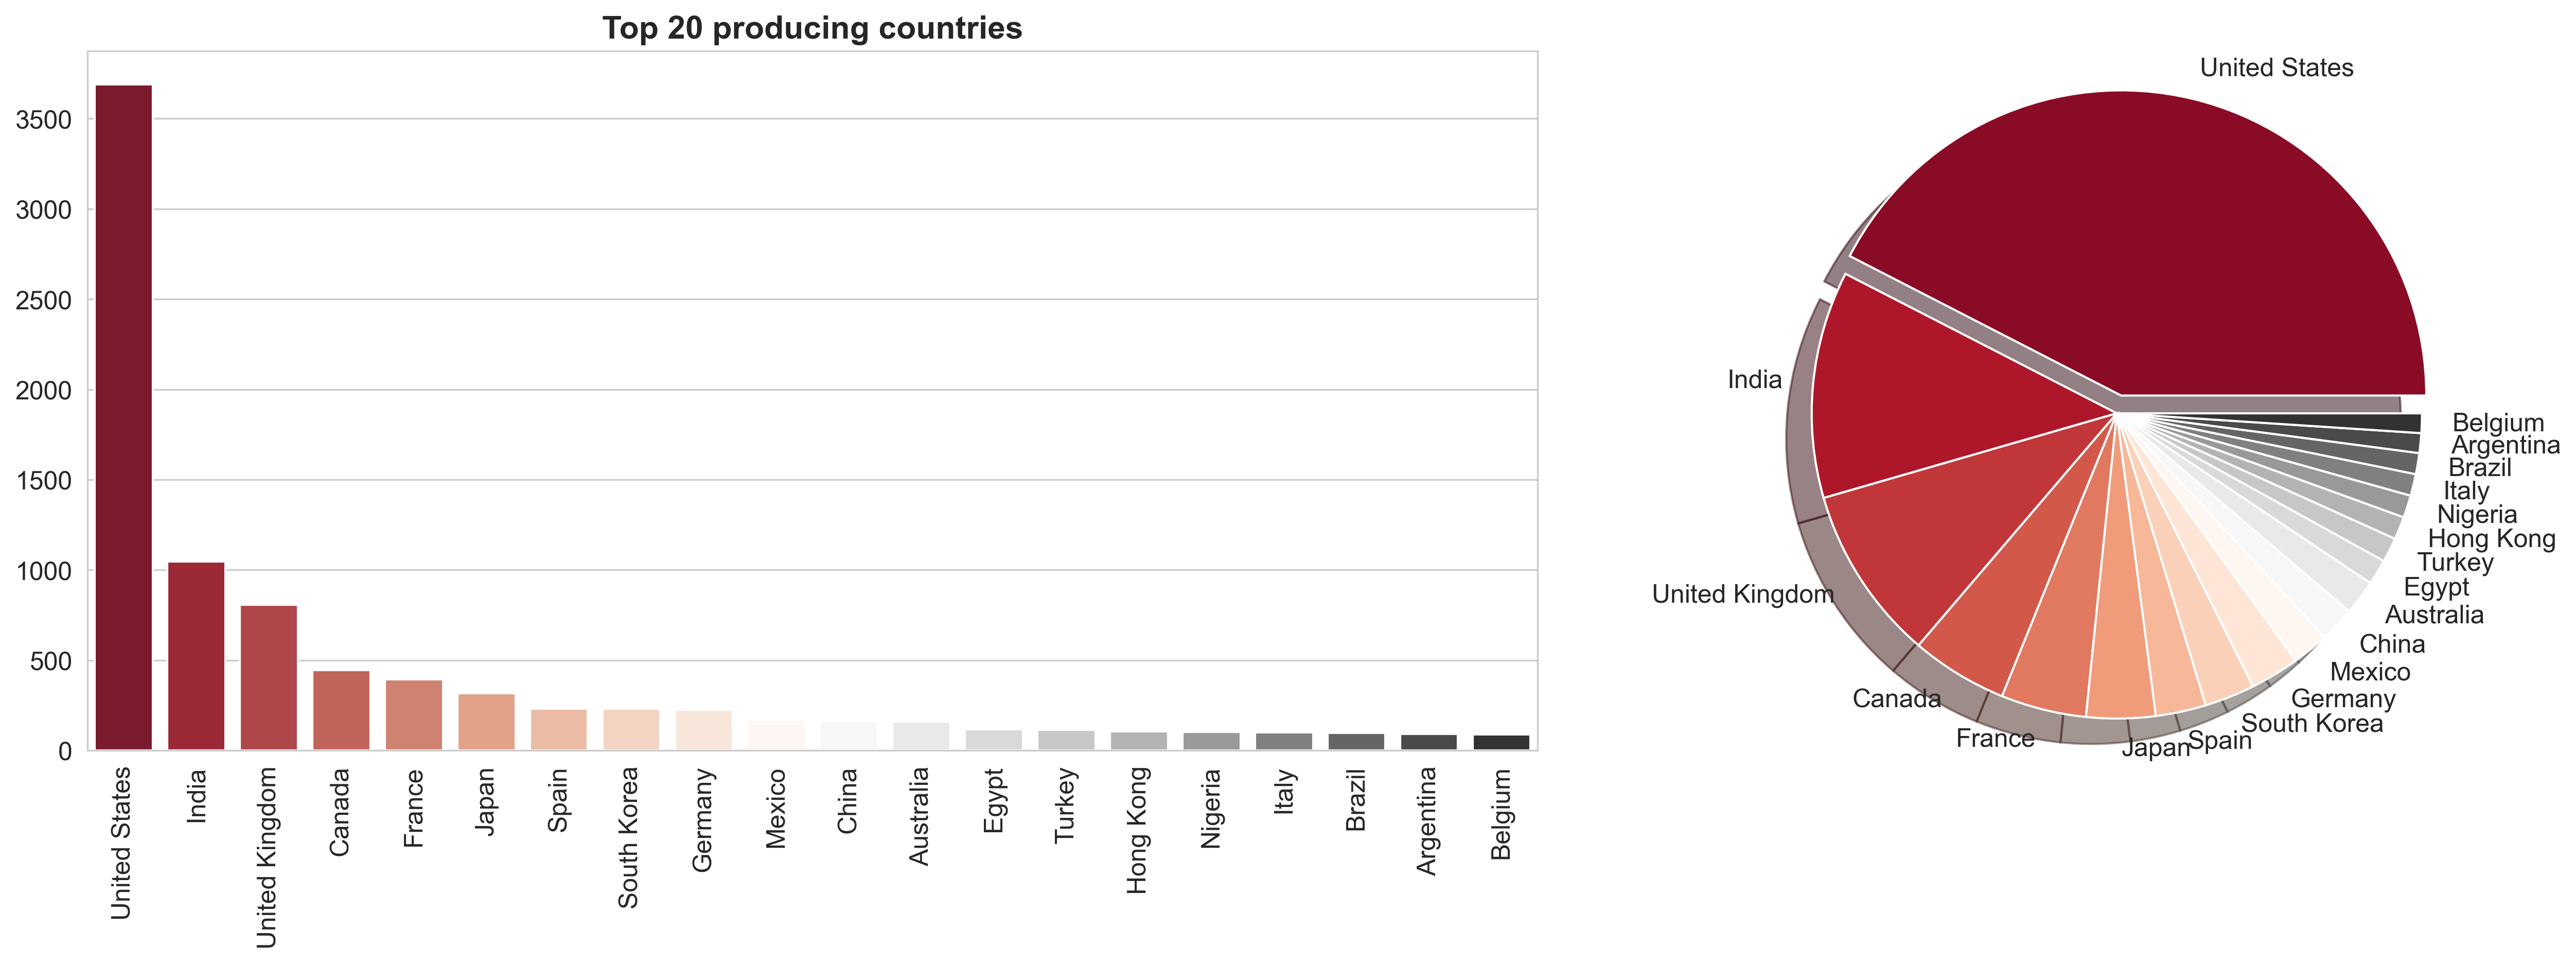

In [15]:
from matplotlib import gridspec
fig = plt.figure(figsize = (20,6))
gs = gridspec.GridSpec(nrows = 1 , ncols = 2,
                       height_ratios = [6],
                        width_ratios = [10,5])
ax = plt.subplot(gs[0])
sns.barplot(top20_country.index , top20_country , ax = ax , palette = 'RdGy')
ax.set_xticklabels(top20_country.index, rotation = '90')
ax.set_title('Top 20 producing countries' , fontsize = 15 , fontweight = 'bold')

explode = [ 0 for _ in range(20)]
explode[0] = 0.06

ax2 = plt.subplot(gs[1])
ax2.pie(top20_country , labels = top20_country.index , shadow = True , startangle = 0 , explode = explode , 
        colors = sns.color_palette('RdGy' , n_colors = 20))
        
ax2.axis('equal')
plt.show()

In [16]:
from sklearn.preprocessing import MultiLabelBinarizer

def relation_heatmap(df , title):
    df['genre'] = df['listed_in'].apply(lambda x : x.replace(',' , ',').replace(',' ,',').split(','))
    Types = []
    for i in df['genre'] : Types += i
    Types = set(Types)
    print(f'There are {len(Types)} types in the Netflix {title} Dateset')
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test) , columns = mlb.classes_, index = test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype = np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig , ax = plt.subplots(figsize = (15,15))
    pl = sns.heatmap(corr, mask = mask , cmap = 'coolwarm' , vmax = 0.5 , vmin = -0.5, center = 0, square = True, 
                    linewidths = 0.7 , cbar_kws = {'shrink' : 0.6})
    plt.show()

There are 37 types in the Netflix Movie Dateset


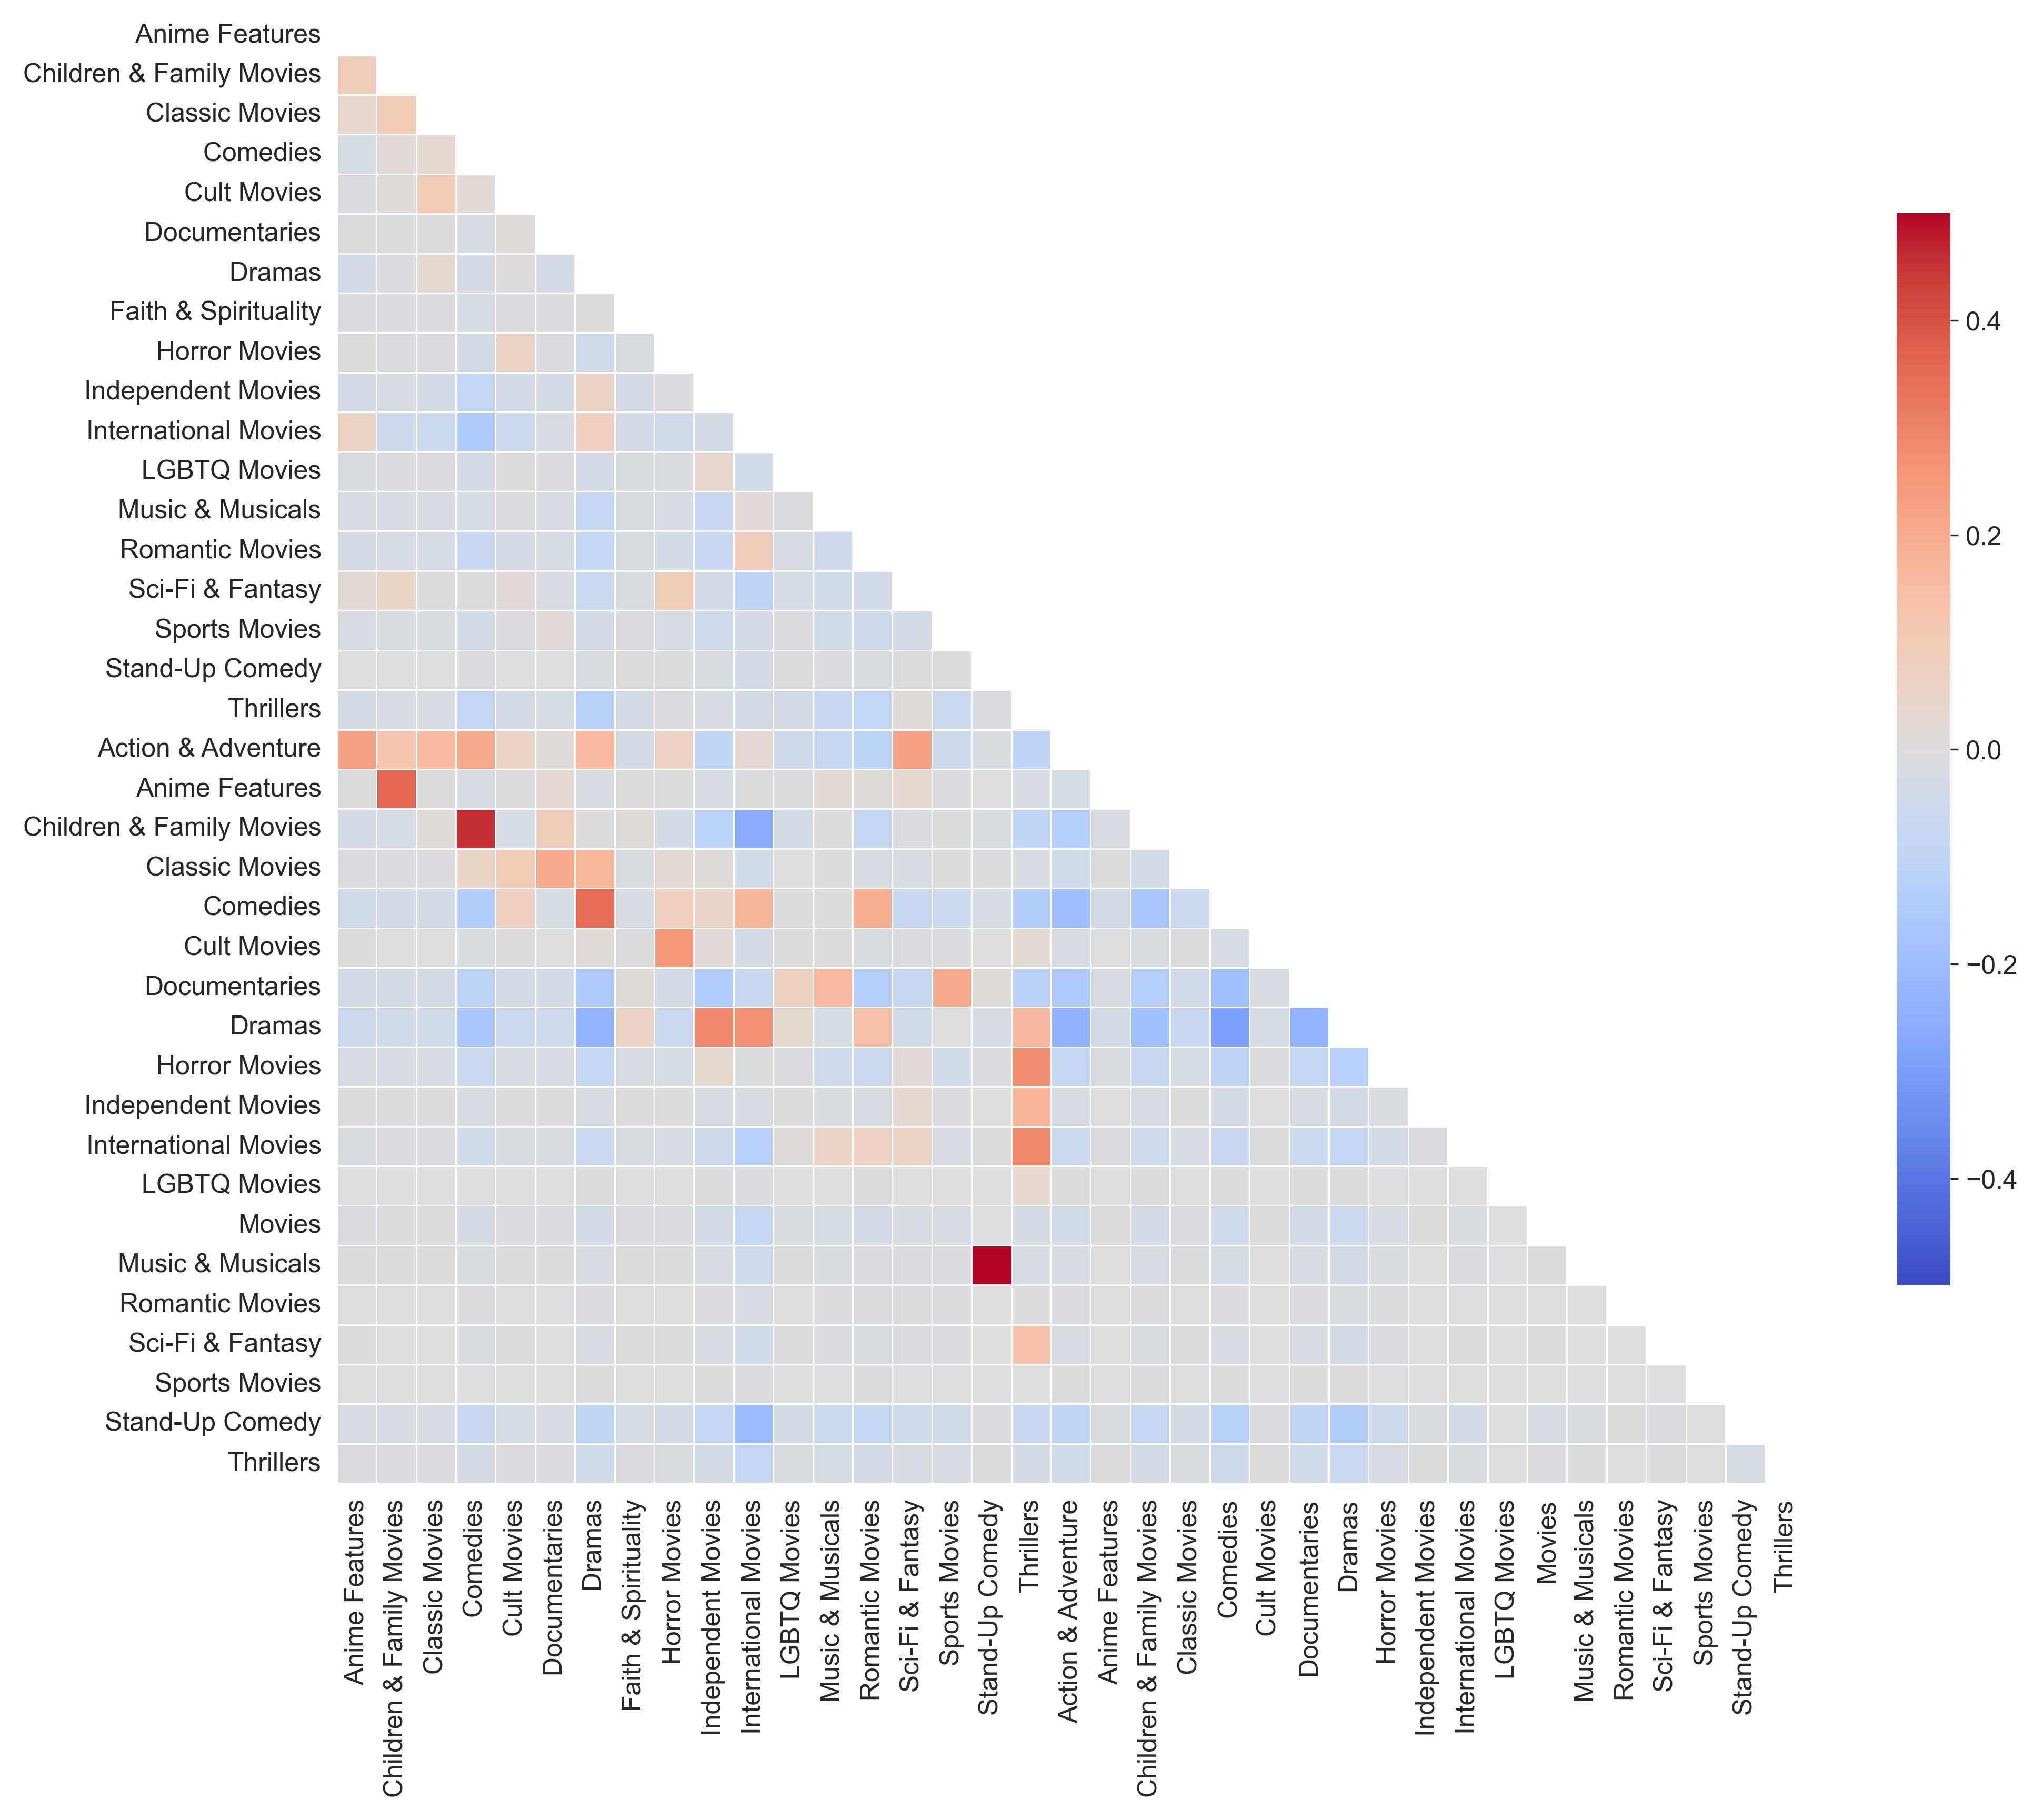

In [17]:
relation_heatmap(movie , 'Movie')

There are 36 types in the Netflix TV Show Dateset


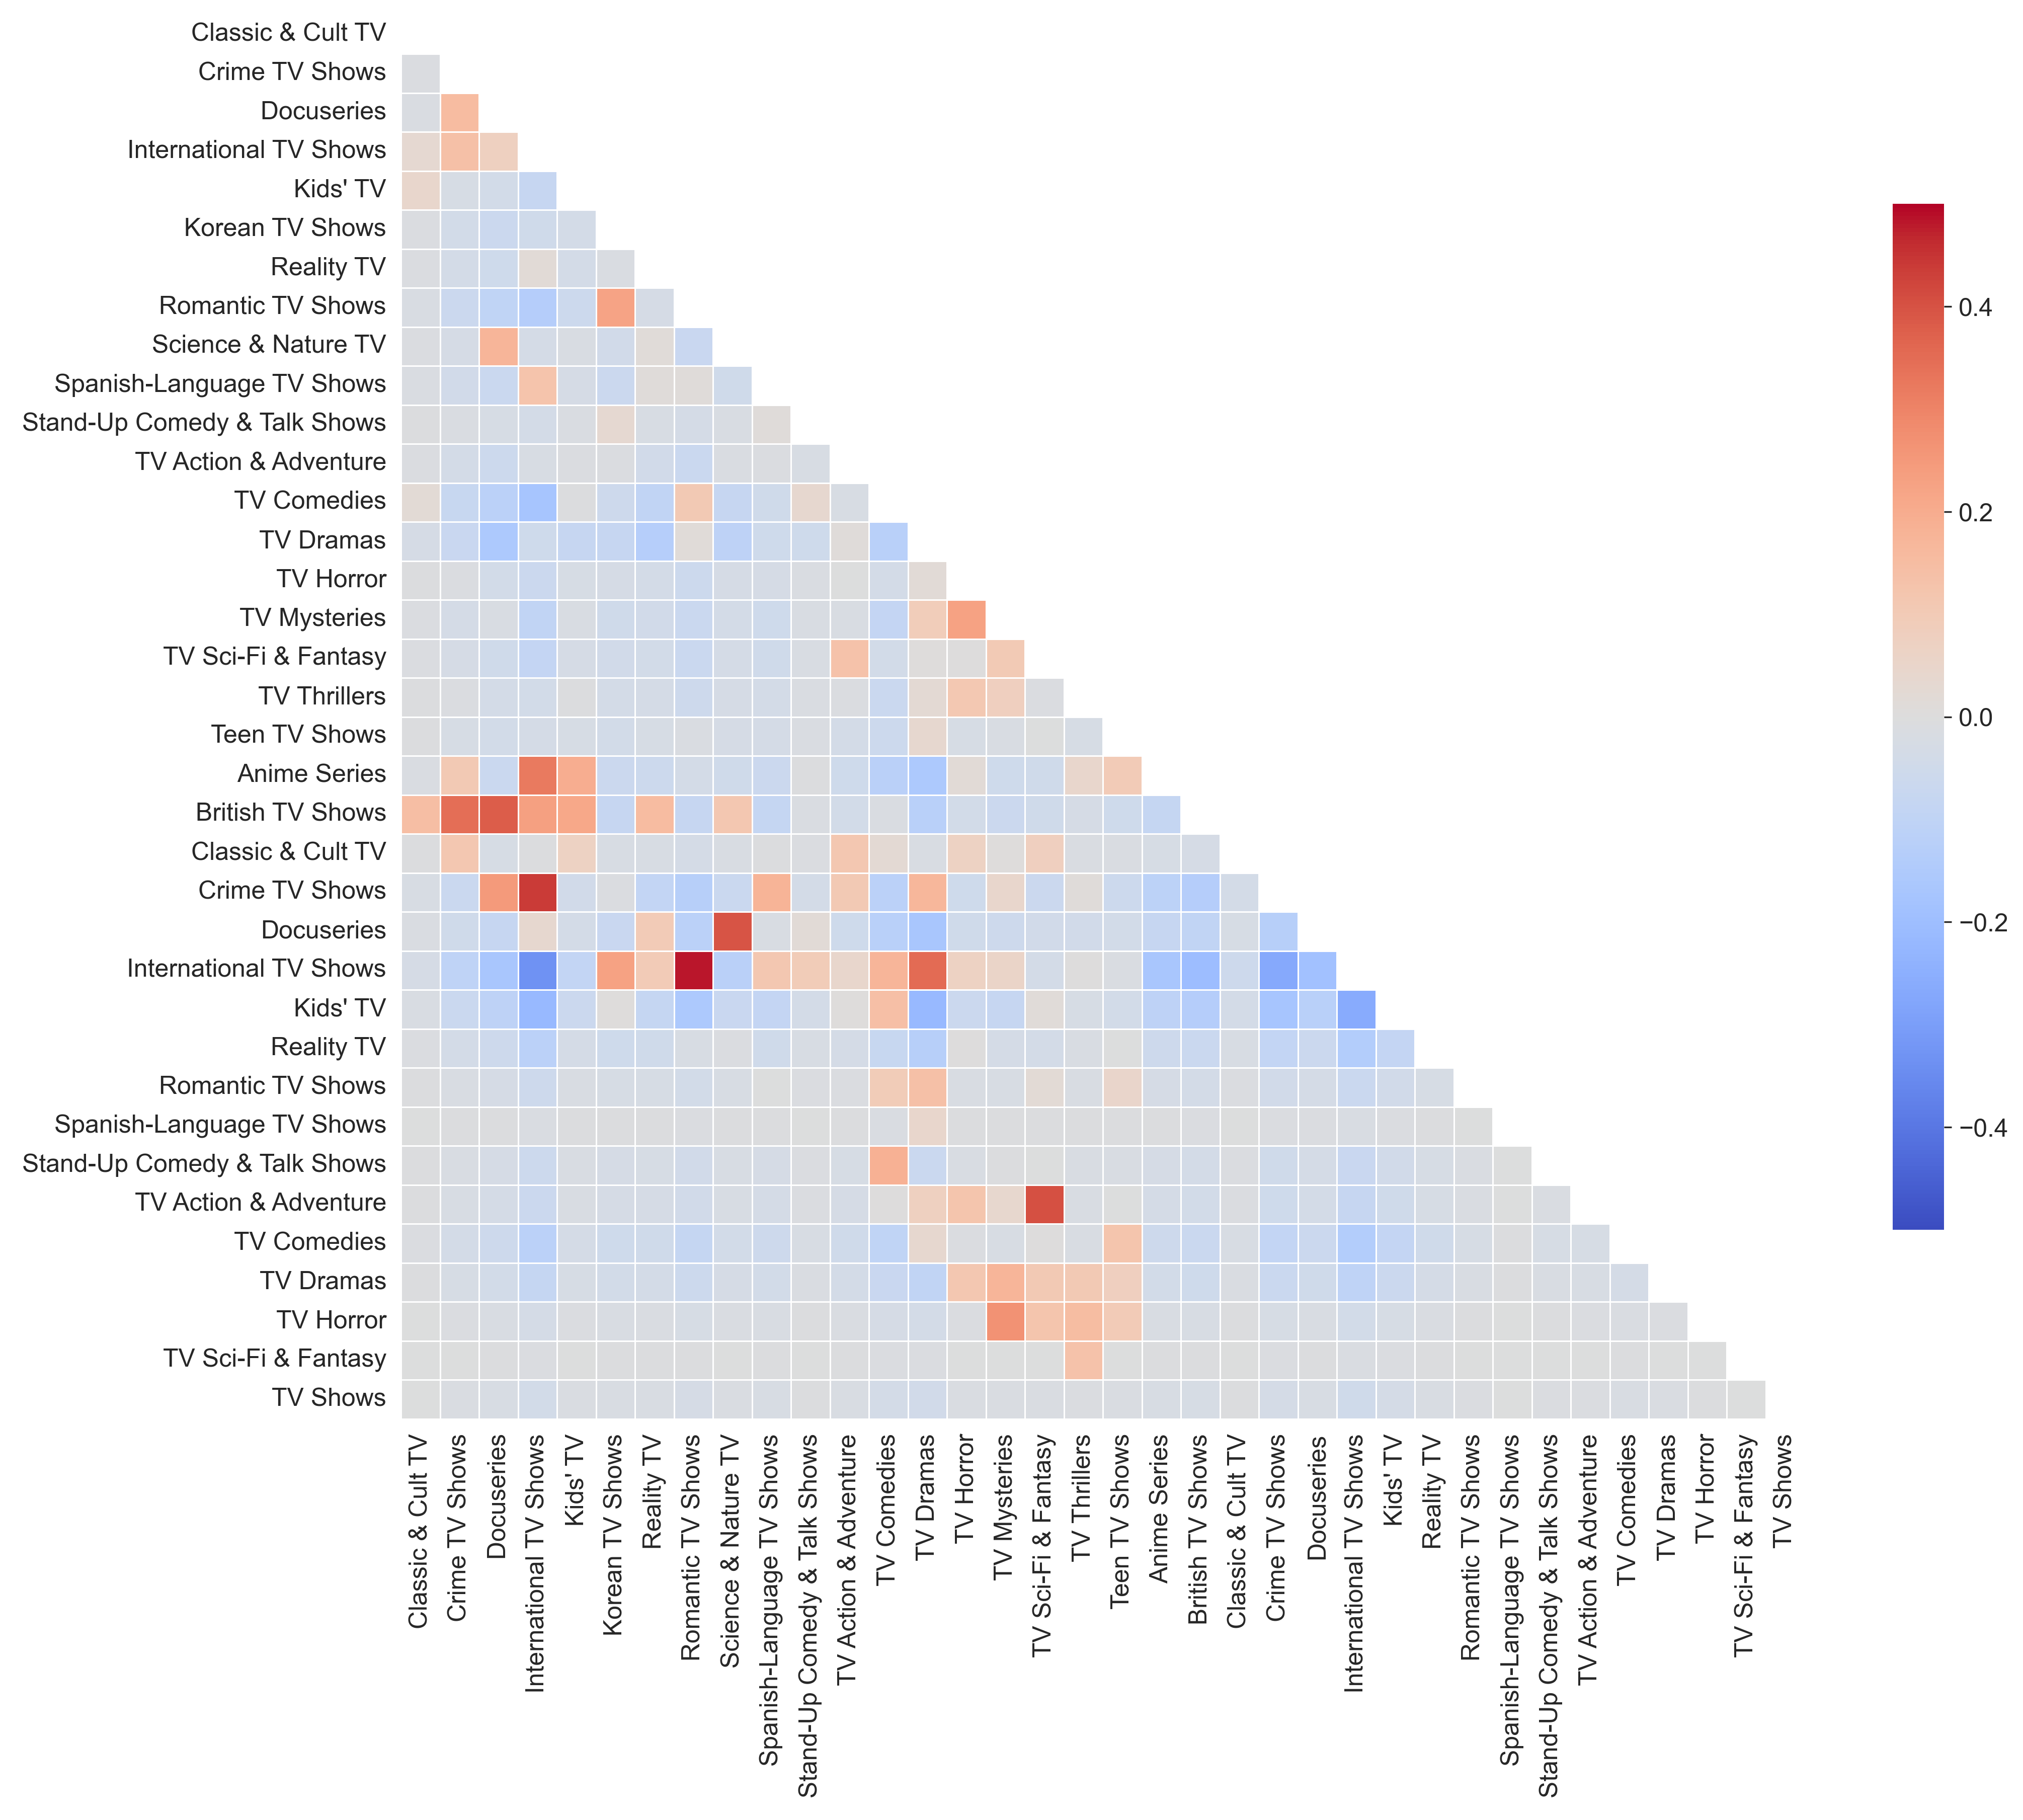

In [18]:
relation_heatmap(tv_show , 'TV Show')

In [19]:
def rating_barplot(data , title , height ,h_lim = None):
    fig , ax = plt.subplots(1,1, figsize = (20,10))
    if h_lim:
        ax.set_ylim(0,h_lim)
    ax.bar(data.index , data , color = '#d0d0d0' , width = 0.6 , edgecolor = 'black')
    
    color = ['green' , 'blue' , 'orange' , 'red']
    span_range = [[0,2] , [3,6] , [7,8] , [9,11]]
    
    for idx , sub_title in enumerate(['Little Kids' , 'Older Kids' , 'Teens' , 'Mature']):
        ax.annotate(sub_title , 
                   xy = (sum(span_range[idx])/2 ,height),
                   xytext = (0,0) , textcoords = 'offset points',
                   va = 'center' , ha = 'center',
                   color = 'w' , fontsize = 16 , fontweight = 'bold',
                   bbox = dict(boxstyle = 'round4' , pad = 0.4 , color = color[idx] , alpha = 0.6))
        ax.axvspan(span_range[idx][0]-0.4 , span_range[idx][1]+0.4 , color = color[idx], alpha = 0.1)
    ax.set_title(f'Distribution of {title} Rating',fontsize = 20 , fontweight = 'bold' , position = (0.5, 1.0 + 0.03))
    plt.show()

In [21]:
rating_order = ['G' , 'TV-Y' , 'TV-G' , 'PG' , 'TV-Y7' , 'TV-Y7-FV' , 'TV-PG' , 'PG-13' , 'TV-14' , 'R' , 'NC-17' ,'TV-MA']
movie_rating = movie['rating'].value_counts()[rating_order]

In [22]:
rating_order = [ 'TV-Y' , 'TV-G' , 'TV-Y7' , 'TV-Y7-FV' , 'TV-PG'  , 'TV-14' , 'R'  ,'TV-MA']
tv_rating = tv_show['rating'].value_counts()[rating_order].fillna(0)

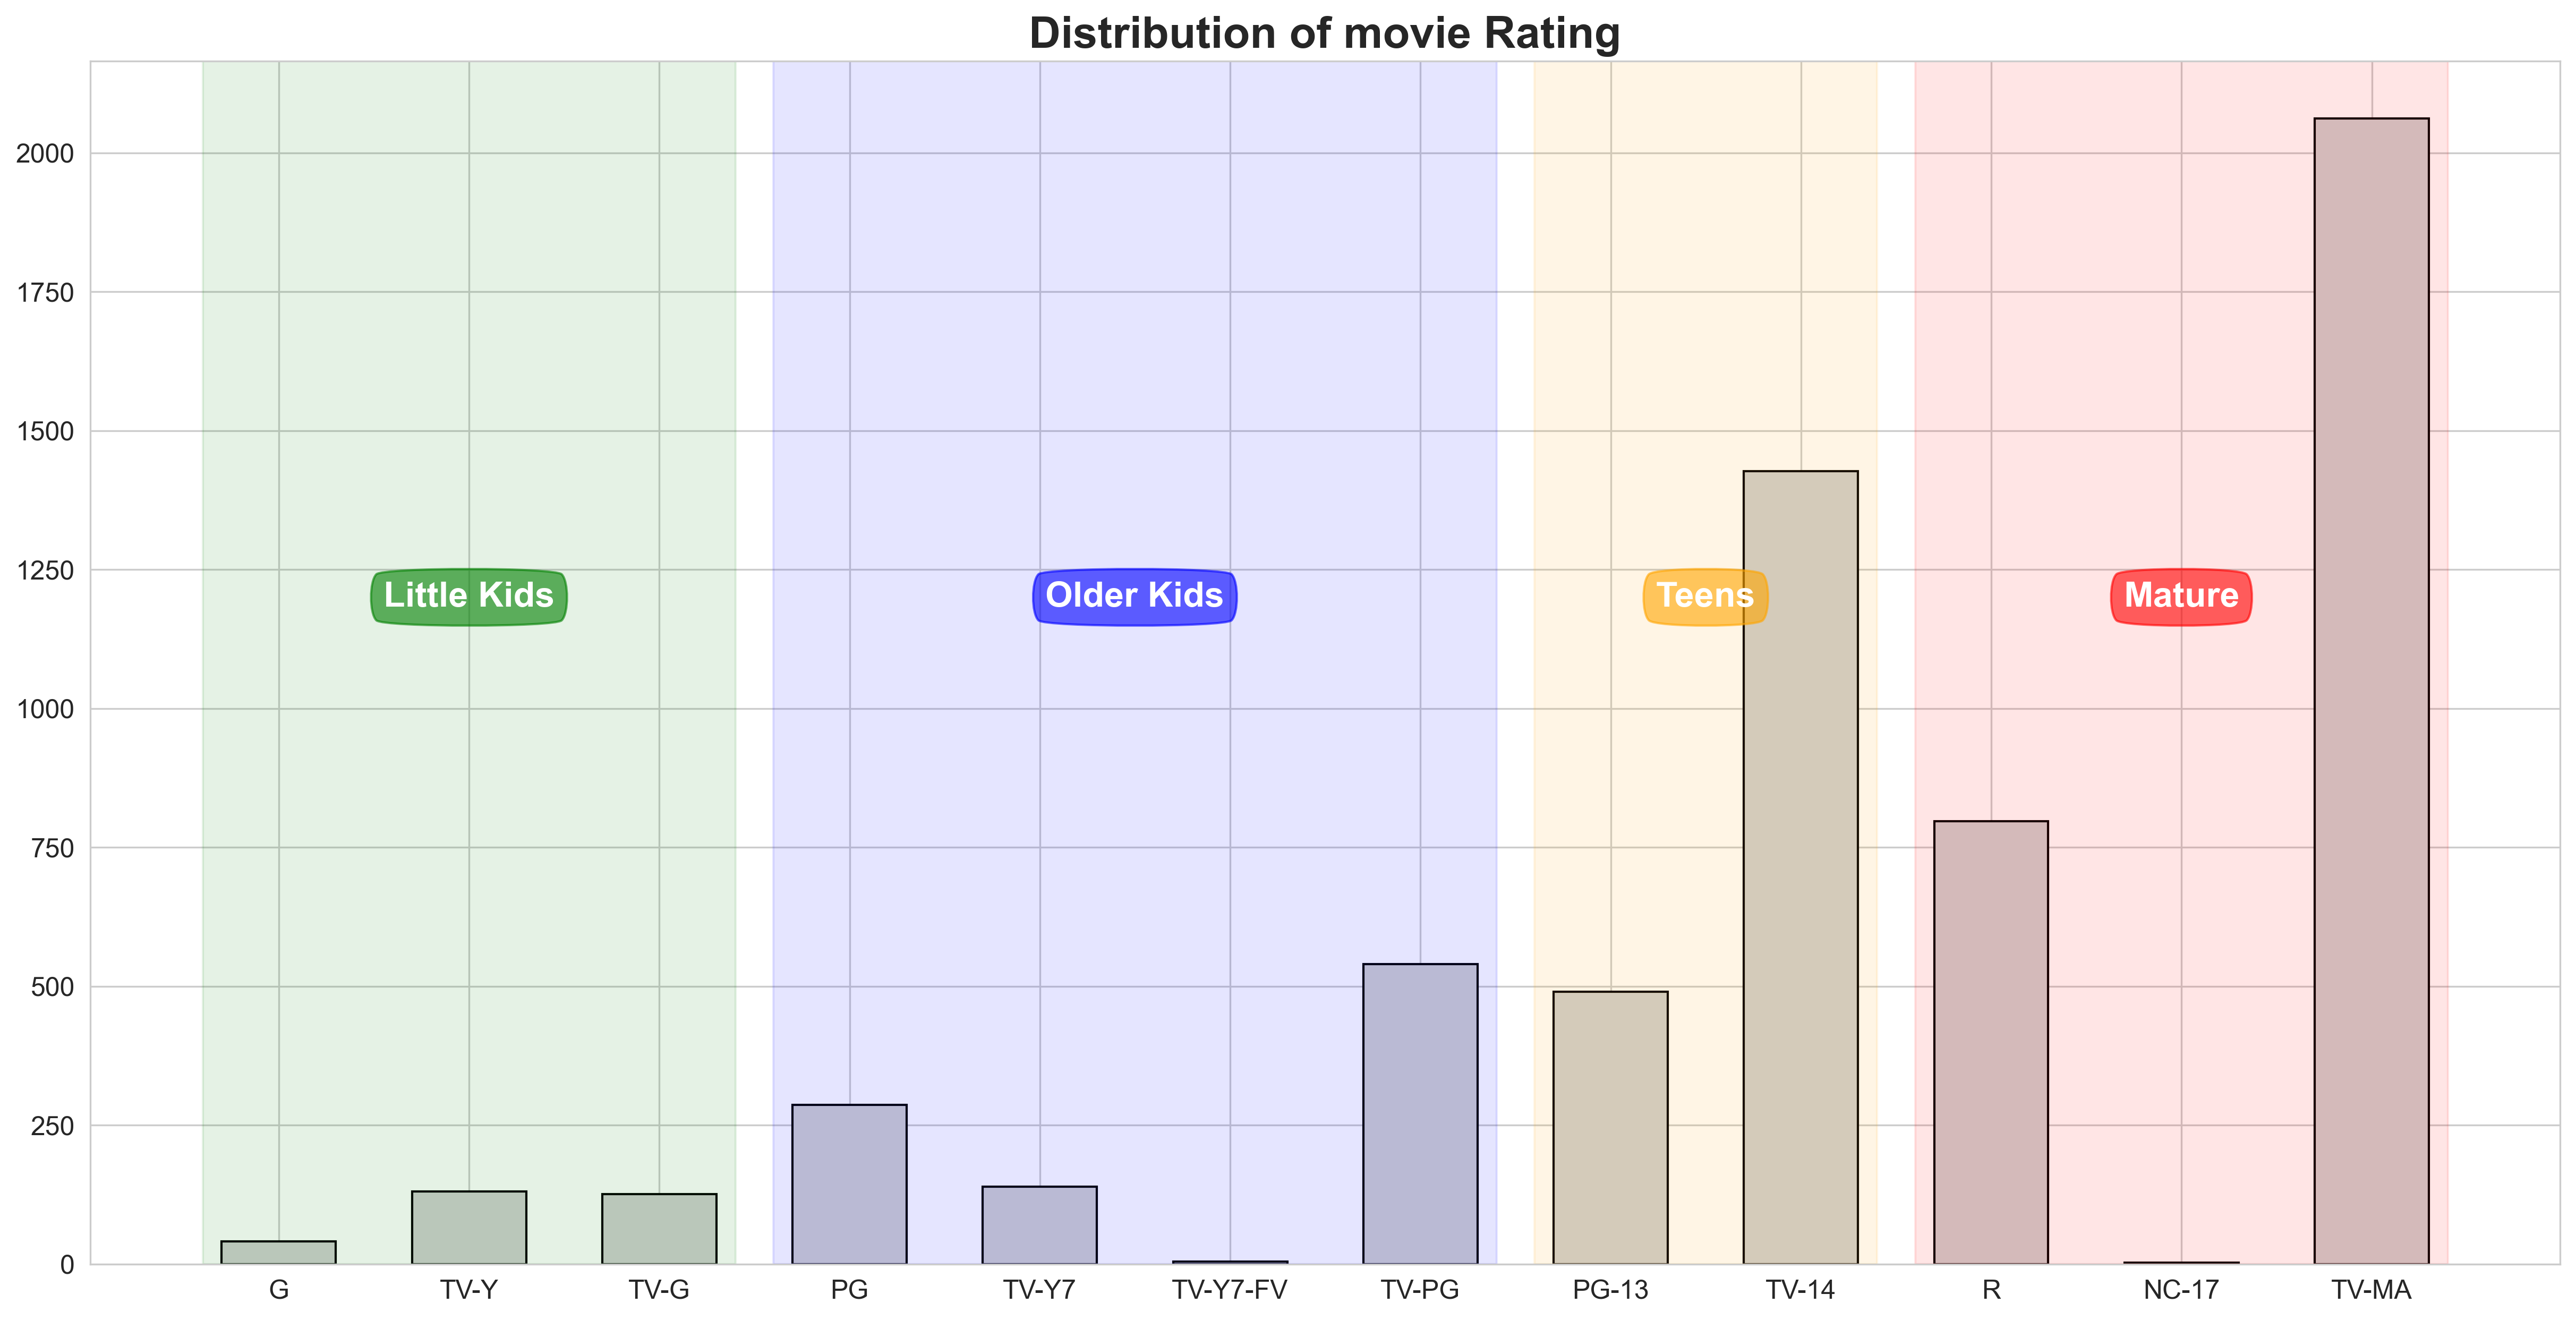

In [23]:
rating_barplot(movie_rating , "movie" , 1200)

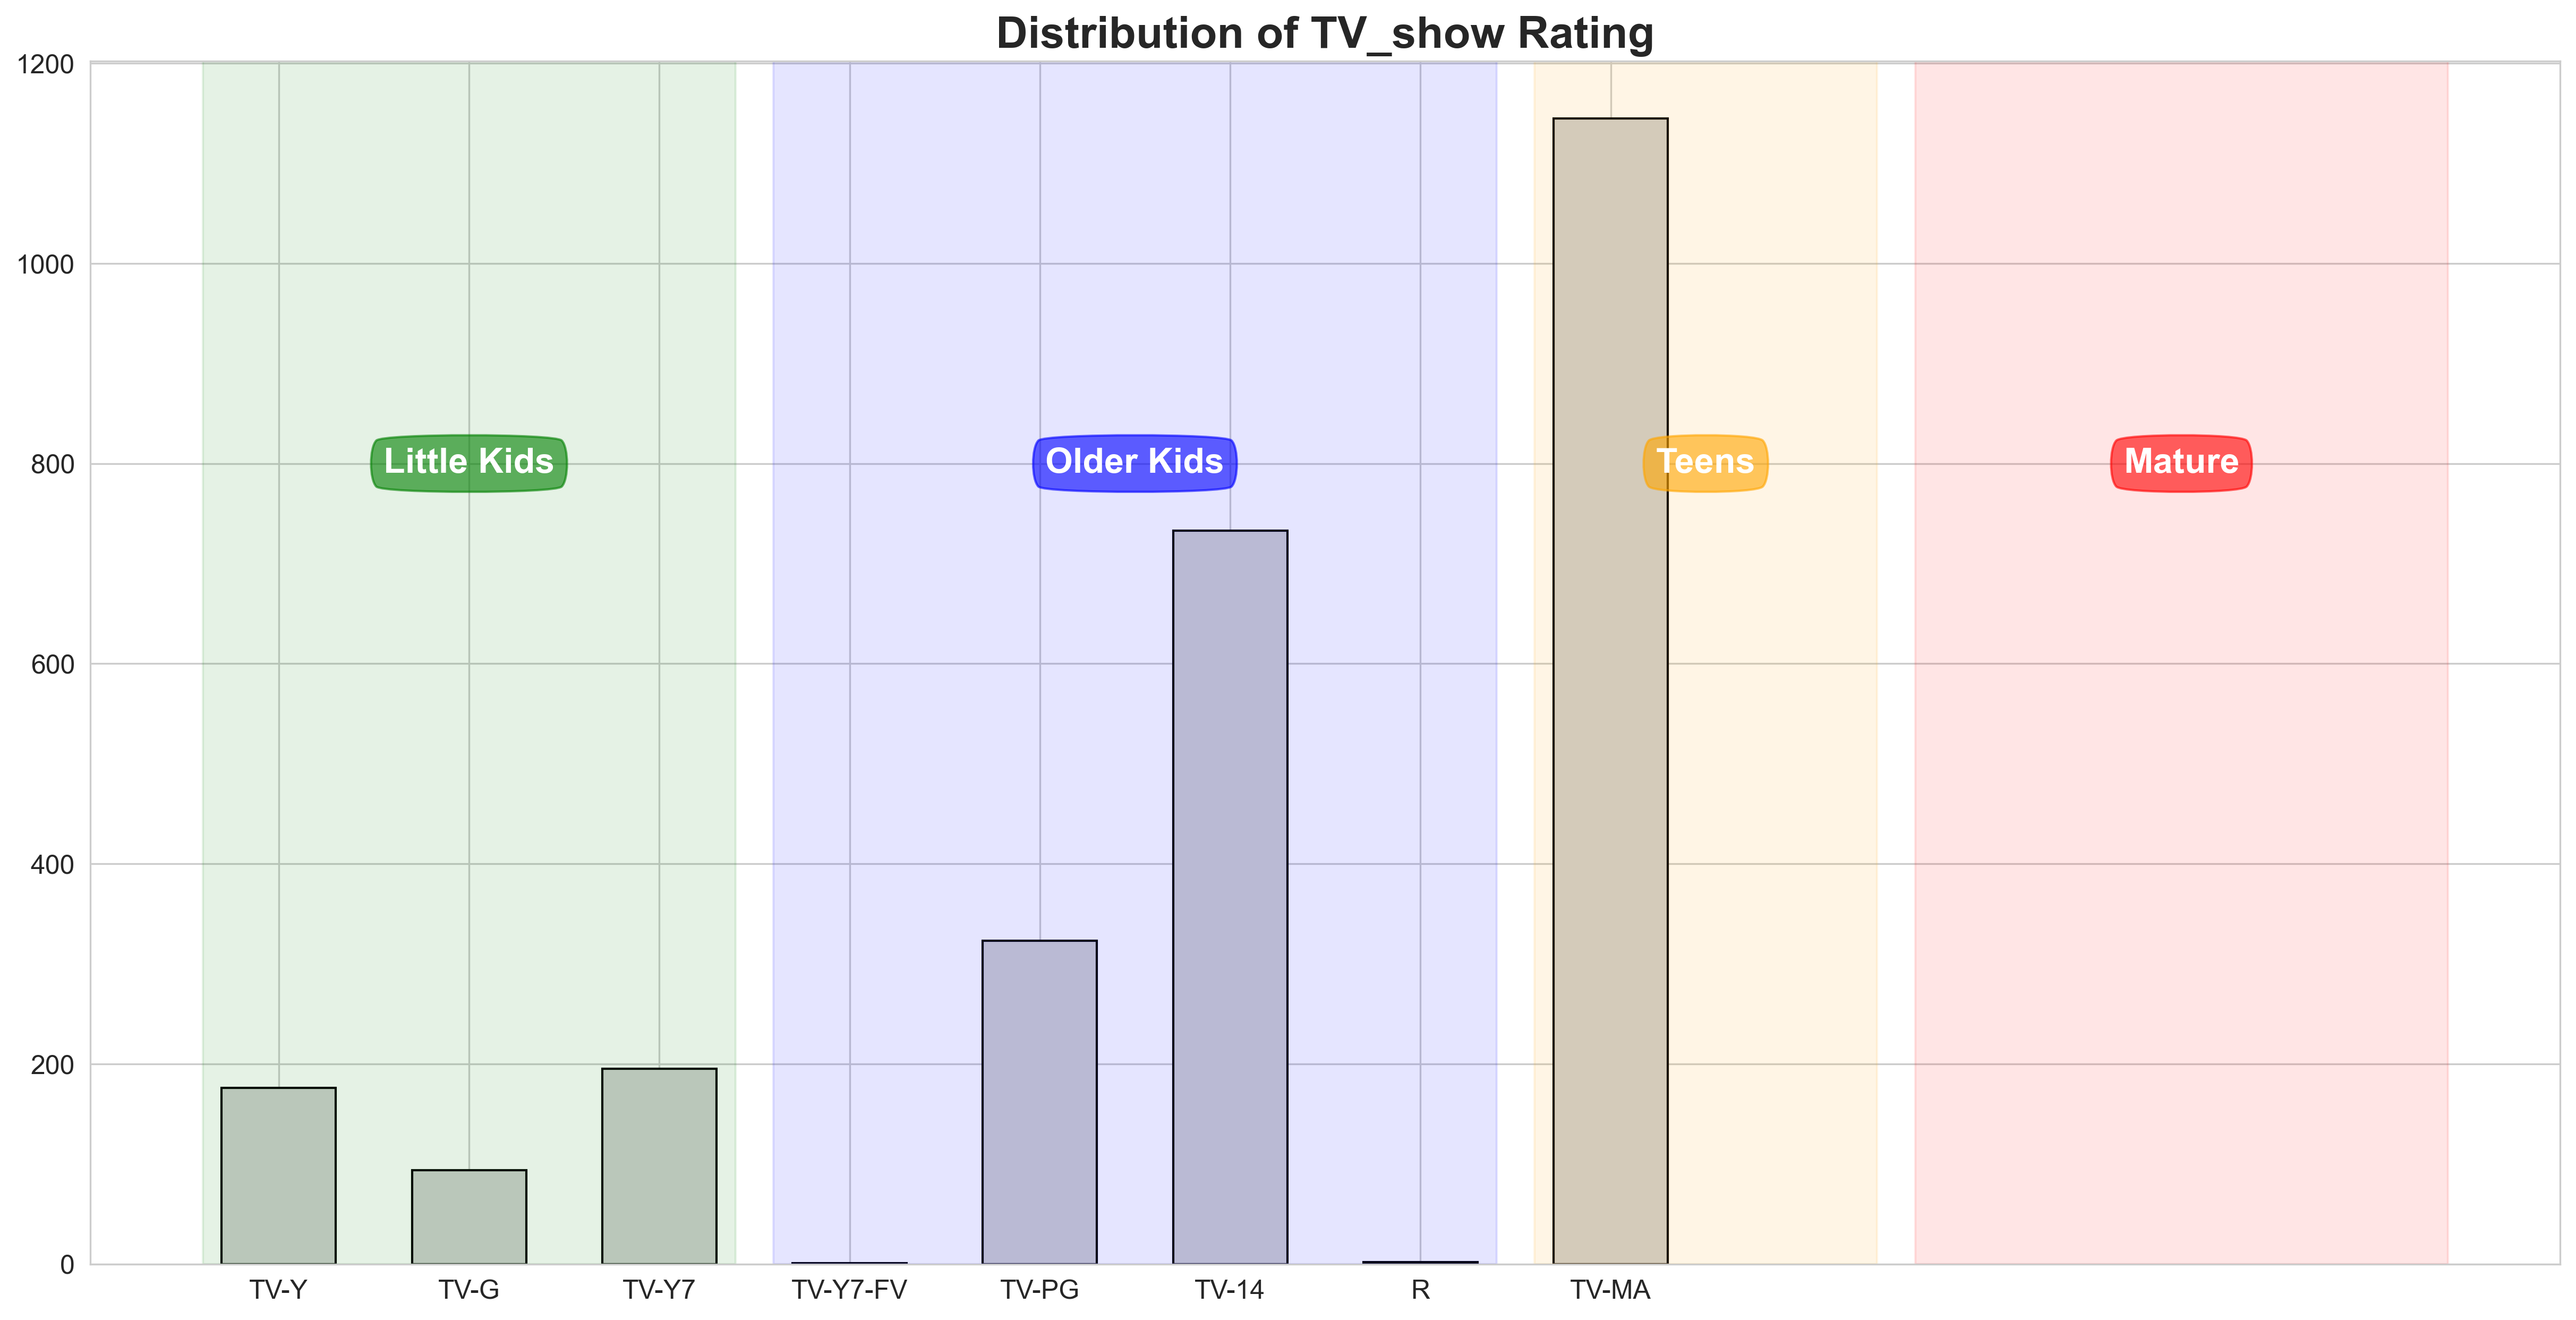

In [24]:
rating_barplot(tv_rating , 'TV_show' , 800)